$\textbf{Question 1}$

After performing a matrix multiplication of a (n,k) matrix $\textbf{A} = [a_{ij}]_{n\times k}$  and (k,m) matrix $\textbf{B} = [b_{ij}]_{k\times m}$ , the resultant matrix $\textbf{C}$ if of dimensions (n,m) where each element $c_{ij}$ is calculated by taking the dot product of $i^{\text{th}}$ of $\textbf{A}$ and $j^{\text{th}}$ of $\textbf{B}$ 

$c_{ij} = \sum_{r=1}^{k} a_{ir}.b_{rj}$

The number of multiplications required to calculate one element is $k$ as each $r^{\text{th}}$ element in the $i^{\text{th}}$ row ( k elements in one row) is multiplied by a corresponding $r^{\text{th}}$ element in the $j^{\text{th}}$ colunm (with k elements). These numbers are then added (k numbers so (k-1) additions) to get the corresponnding element in matrix $C$

Since there are n*m elements in matrix $C$,
The number of multiplications is $nmk$.
The number of additions are $nm(k-1)$

$\textbf{Question 2}$

In [21]:

import numpy as np
import timeit

# Manual Method
def manual_multiply(matrix_1, matrix_2):
    matrix_3 = [[0 for i in range(len(matrix_2[0]))] for j in range(len(matrix_1))]
    for i in range(len(matrix_1)):
        for j in range(len(matrix_2[0])):
            sums = 0
            for k in range(len(matrix_2)):
                sums += matrix_1[i][k] * matrix_2[k][j]
            matrix_3[i][j] = sums
    return matrix_3



# Using numpy Method
def numpy_multiply(matrix_1, matrix_2):
    mtx1 = np.array(matrix_1)
    mtx2 = np.array(matrix_2)
    mtx3 = np.matmul(mtx1, mtx2)
    return mtx3


matrix_1 = [[1, 2], [3, 4], [5, 6]]
matrix_2 = [[10, 11, 12, 13], [14, 15, 16, 17]]

manual_time = timeit.timeit(lambda: manual_multiply(matrix_1, matrix_2), number=1000)
numpy_time = timeit.timeit(lambda: numpy_multiply(matrix_1, matrix_2), number=1000)


res1 = manual_multiply(matrix_1, matrix_2)
res2 = numpy_multiply(matrix_1, matrix_2)

print("Manual method result:")
print(res1)

print("Numpy method result:")
print(res2)

print(f"The amount of time taken by the manual method is {manual_time} seconds for thousand iterations")
print(f"The amount of time taken by numpy is {numpy_time} seconds for thousand iterations")


Manual method result:
[[38, 41, 44, 47], [86, 93, 100, 107], [134, 145, 156, 167]]
Numpy method result:
[[ 38  41  44  47]
 [ 86  93 100 107]
 [134 145 156 167]]
The amount of time taken by the manual method is 0.005305200000293553 seconds for thousand iterations
The amount of time taken by numpy is 0.002911800000219955 seconds for thousand iterations


The numpy implementation of matrix multiplication is faster than list of lists as numpy is a highly optimized library which is written in a low level language C. It also uses the BLAS algotritthm which is a highly optimised way to perform matrix multiplication than the normal list of list method that we use manually

$\textbf{Question 3}$

According to the method given in the question, each time we parse the array, we will iterate through $n$ elements and we will have to iterate through the array $\lfloor \frac{(n+1)}{2} \rfloor$ times to obtian the median (as it is the midway element). The time complexity for this method would be $O(n^2)$ 

A better method would be to sort the array(Using an efficient sorting algorithm) and then pick out the middle element $($ $n/2$ or $(n+1)/2$ $)$. The time complexity for sorting will be $O(nlog(n))$ and the time complexity for choosing the middle element is $O(1)$. So the total time complexity here would be $O(nlog(n))$

Note that we could also use quickselect algortihm, which on average would be faster than both method as it has average time complexity $O(n)$ but its worst time complexity is $O(n^2)$ and may be slower than the original method

In [24]:
import numpy as np
import timeit

def met1(arr):
    n = len(arr)
    for i in range(n):
        maxs = -100000
        maxind = -1
        for j in range(n-i):
            if arr[j] > maxs:
                maxs = arr[j]
                maxind = j
        arr[maxind], arr[n-i-1] = arr[n-i-1], arr[maxind]
    
    if n % 2 == 1:
        return arr[n // 2]
    else:
        return (arr[n // 2 - 1] + arr[n // 2]) / 2

def met2(arr):
    sortarr=sorted(arr)
    n=len(arr)
    if n%2==1:
        return sortarr[n//2]
    else:
        return (sortarr[n//2-1] + sortarr[n//2])/2

arr = np.random.randint(0, 100, size=200).tolist()
met1med = met1(arr)
met2med = met2(arr)
npmed = np.median(arr)

print(f"The median obtained by method one is {met1med}")
print(f"The median obtained by method two is {met2med}")
print(f"The median obtained by numpy is {npmed}")
print()

swapping_time = timeit.timeit(lambda: met1(arr.copy()), number=1000)
sorting_time = timeit.timeit(lambda: met2(arr.copy()), number=1000)
numpy_time = timeit.timeit(lambda: np.median(arr), number=1000)

print(f"The amount of time taken by method 1 is {swapping_time} seconds")
print(f"The amount of time taken by method 2 is {sorting_time} seconds")
print(f"The amount of time taken by numpy.median is {numpy_time} seconds")


The median obtained by method one is 50.0
The median obtained by method two is 50.0
The median obtained by numpy is 50.0

The amount of time taken by method 1 is 1.1001467000023695 seconds
The amount of time taken by method 2 is 0.003836300005787052 seconds
The amount of time taken by numpy.median is 0.03472920000785962 seconds


$\textbf{Question 4}$

Given Function $F(x,y)$ = ${x^2y + y^3sin(x)}$

$\textbf{Gradient With Respect to x}$: 
To get Gradient With Respect to $x$ We partially differentiate the given function $F(x,y)$ with x:

$$\frac{\partial f}{\partial x} = \frac{\partial}{\partial x} (x^2 y + y^3 \sin(x))$$
$$\frac{\partial f}{\partial x} = \frac{\partial}{\partial x} (x^2 y) + \frac{\partial}{\partial x} (y^3 \sin(x)) $$
$$\frac{\partial f}{\partial x} = 2xy + y^3cos(x)$$

The gradient of $F(x,y)$ with respect to x is $2xy + y^3cos(x)$


$\textbf{Gradient With Respect to y}$: 
To get Gradient With Respect to $y$ We partially differentiate the given function $F(x,y)$ with y:

$$\frac{\partial f}{\partial y} = \frac{\partial}{\partial y} (x^2 y + y^3 \sin(x))$$
$$\frac{\partial f}{\partial y} = \frac{\partial}{\partial y} (x^2 y) + \frac{\partial}{\partial x} (y^3 \sin(x)) $$
$$\frac{\partial f}{\partial y} = x^2 + 3y^2sin(x)$$

The gradient of $F(x,y)$ with respect to y is $x^2 + 3y^2sin(x)$

$\textbf{Question 5}$

In [2]:
import jax
import jax.numpy as jnp
import numpy as np

def f(x, y):
    return x**2 * y + y**3 * jnp.sin(x)

def mangrad(x, y):
    diffx = 2*x*y + y**3 * jnp.cos(x)
    diffy = x**2 + 3*y**2 * jnp.sin(x)
    return jnp.array([diffx, diffy])

jaxgrad = jax.grad(lambda xy: f(xy[0], xy[1]))

random_values = np.random.rand(5, 2)  

for i, (x, y) in enumerate(random_values):
    xy = jnp.array([x, y])
    gradjax = jaxgrad(xy)
    anagrad = mangrad(x, y)
    
    print(f"Test {i+1}:")
    print(f"Values: x = {x}, y = {y}")
    print(f"JAX gradient: {gradjax}")
    print(f"Analytical gradient: {anagrad}")
    print()


Test 1:
Values: x = 0.4772066971553188, y = 0.8690780695248099
JAX gradient: [1.412538  1.2684488]
Analytical gradient: [1.412538 1.268449]

Test 2:
Values: x = 0.7727355797851868, y = 0.9146774560601127
JAX gradient: [1.9615301 2.349276 ]
Analytical gradient: [1.9615302 2.349276 ]

Test 3:
Values: x = 0.8472270018508956, y = 0.43261478973438927
JAX gradient: [0.7866507 1.1385832]
Analytical gradient: [0.7866507 1.1385833]

Test 4:
Values: x = 0.22963445136128402, y = 0.7083632098009863
JAX gradient: [0.6714402  0.39537883]
Analytical gradient: [0.6714401 0.3953788]

Test 5:
Values: x = 0.851800846440374, y = 0.35706098895292226
JAX gradient: [0.6382722 1.0133668]
Analytical gradient: [0.6382722 1.0133667]



$\textbf{Question 6}$

In [25]:
import sympy as sp

def manualgrad(xp,yp):
    xval = 2 * xp * yp + yp**3 * np.cos(xp)
    yval = xp**2 + 3 * yp**2 * np.sin(xp)
    return xval, yval

x, y = sp.symbols('x y')
f = x**2 * y + y**3 * sp.sin(x)
diffx = sp.diff(f, x)
diffy = sp.diff(f, y)
print(" The gradient with respect to x is ", diffx)
print(" The gradient with respect to y is ", diffy)

test_points = [(1, 2), (3, 15), (18, 12), (10, 6), (9, 11)]

for xvs, yvs in test_points:
    df_dx = diffx.evalf(subs={x: xvs, y: yvs})
    df_dy = diffy.evalf(subs={x: xvs, y: yvs})
    dfx,dfy = manualgrad(xvs,yvs)
    print()
    print(f"Test point is x = {xvs} and y = {yvs}")
    print(f"Analytical Gradient: (df/dx = {dfx}, df/dy = {dfy})")
    print(f"SymPy Gradient: (df/dx = {df_dx}, df/dy = {df_dy})")
    

 The gradient with respect to x is  2*x*y + y**3*cos(x)
 The gradient with respect to y is  x**2 + 3*y**2*sin(x)

Test point is x = 1 and y = 2
Analytical Gradient: (df/dx = 8.322418446945118, df/dy = 11.097651817694757)
SymPy Gradient: (df/dx = 8.32241844694512, df/dy = 11.0976518176948)

Test point is x = 3 and y = 15
Analytical Gradient: (df/dx = -3251.2246760265034, df/dy = 104.25600544041036)
SymPy Gradient: (df/dx = -3251.22467602650, df/dy = 104.256005440410)

Test point is x = 18 and y = 12
Analytical Gradient: (df/dx = 1573.0272718457704, df/dy = -0.42649060536410843)
SymPy Gradient: (df/dx = 1573.02727184577, df/dy = -0.426490605364077)

Test point is x = 10 and y = 6
Analytical Gradient: (df/dx = -61.23945028051372, df/dy = 41.24572002394807)
SymPy Gradient: (df/dx = -61.2394502805137, df/dy = 41.2457200239481)

Test point is x = 9 and y = 11
Analytical Gradient: (df/dx = -1014.714378568505, df/dy = 230.59901014275763)
SymPy Gradient: (df/dx = -1014.71437856851, df/dy = 230.

$\textbf{Question 7}$

In [26]:
def print_nested(val, nesting = -3): 
	dic={}
	if isinstance(val, type(dic)):
		print('') 
		nesting += 3 
		for k in val: 
			print(nesting * ' ', end='') 
			print(k, end=':') 
			print_nested(val[k],nesting) 
	else: 
		print(val)

dict = {2022 : {"Branch 1": {1:{"Roll No.": 1, "Name" : "Arjun", "Marks": {"Maths":100,"English":89,"Machine Learning": 83}},2:{"Roll No.": 2, "Name" : "Arvin", "Marks": {"Maths":60,"English":59,"Chemistry": 93}}},"Branch 2": {1:{"Roll No.": 2, "Name" : "Arvin", "Marks": {"Maths":60,"English":59,"Chemistry": 93}},}},2023 : {"Branch 1": {1:{"Roll No.": 1, "Name" : "Arjun", "Marks": {"Maths":97,"English":79,"Machine Learning": 63}}},"Branch 2": {1:{"Roll No.": 2, "Name" : "Arvin", "Marks": {"Maths":60,"English":59,"Chemistry": 93}}}}, 2024 : {"Branch 1" : {},"Branch 2" : {}},2025 : {"Branch 1" : {},"Branch 2" : {}}}

print_nested(dict)


2022:
   Branch 1:
      1:
         Roll No.:1
         Name:Arjun
         Marks:
            Maths:100
            English:89
            Machine Learning:83
      2:
         Roll No.:2
         Name:Arvin
         Marks:
            Maths:60
            English:59
            Chemistry:93
   Branch 2:
      1:
         Roll No.:2
         Name:Arvin
         Marks:
            Maths:60
            English:59
            Chemistry:93
2023:
   Branch 1:
      1:
         Roll No.:1
         Name:Arjun
         Marks:
            Maths:97
            English:79
            Machine Learning:63
   Branch 2:
      1:
         Roll No.:2
         Name:Arvin
         Marks:
            Maths:60
            English:59
            Chemistry:93
2024:
   Branch 1:
   Branch 2:
2025:
   Branch 1:
   Branch 2:


$\textbf{Question 8}$

In [27]:
class Empty():
    pass
class db():

    def __init__(self):
        self.db= []
    
    def newYear(self,yearval):
        year = Empty()
        year.year = yearval
        year.branch = []
        self.db.append(year)

    def newBranch(self,yearval,branchname):
        branch = Empty()
        branch.branch = branchname
        branch.student = []
        for i in self.db:
            if i.year == yearval:
                i.branch.append(branch)
                break
    def newStudent(self,yearval,branch,Rollno,name,marks):
        student = Empty()
        student.Rollno = Rollno
        student.name = name
        student.marks = marks
        for i in self.db:
            if i.year == yearval:
                for j in i.branch:
                    if j.branch == branch:
                        j.student.append(student)
                        print("yes")
                        break
                break
    def display(self):
        for year in self.db:
            print(f"Year: {year.year}")
            for branch in year.branch:
                print(f"  Branch: {branch.branch}")
                for student in branch.student:
                    print(f"    Roll No: {student.Rollno}, Name: {student.name}")
                    print(f"      Math Marks: {student.marks.mathmark}, Physics Marks: {student.marks.phymark}")

    def studMarks(self,mathmark,phymark):
        marks = Empty()
        marks.mathmark = mathmark
        marks.phymark = phymark
        return marks

data = db()
data.newYear(2022)
data.newYear(2023)
data.newBranch(2022,"B1")
data.newBranch(2022,"B2")
data.newBranch(2023,"B1")
data.newBranch(2023,"B2")
marks = data.studMarks(80,90)
data.newStudent(2022,"B1",23110040,"Arjun",marks)
data.display()

yes
Year: 2022
  Branch: B1
    Roll No: 23110040, Name: Arjun
      Math Marks: 80, Physics Marks: 90
  Branch: B2
Year: 2023
  Branch: B1
  Branch: B2


$\textbf{Question 9}$

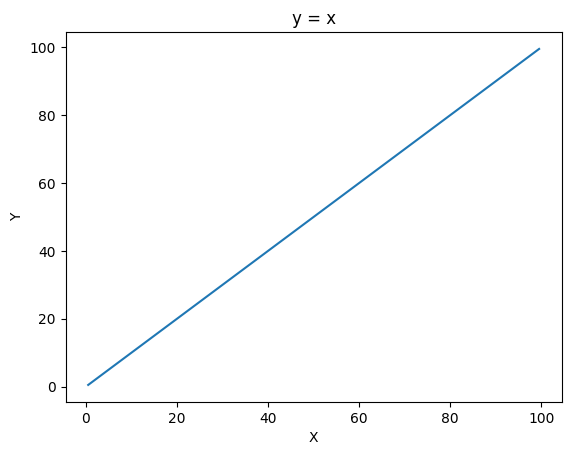

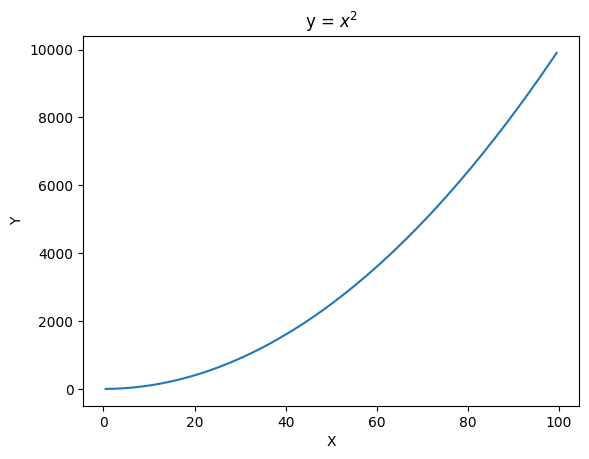

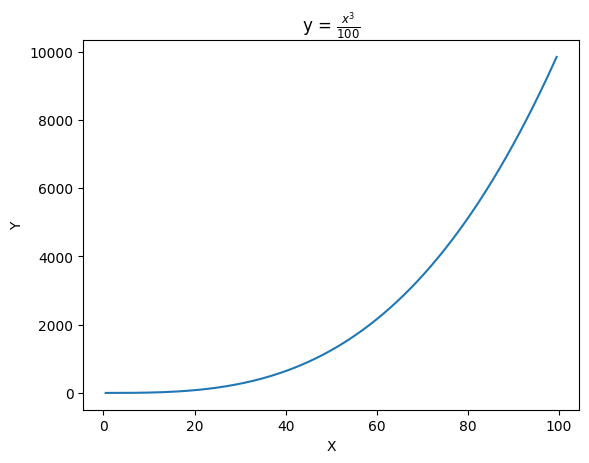

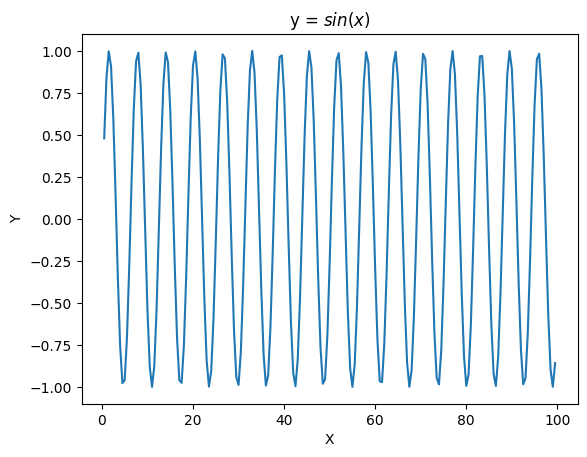

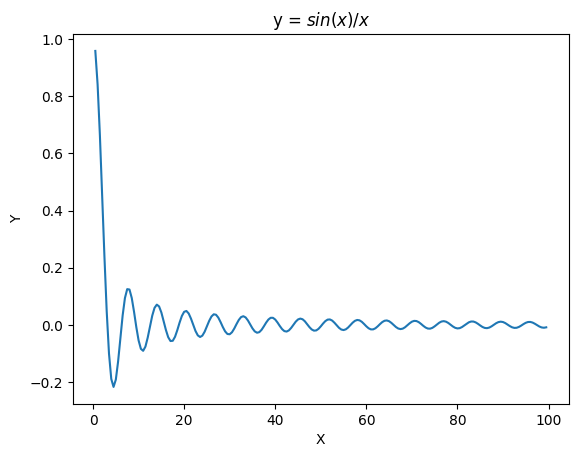

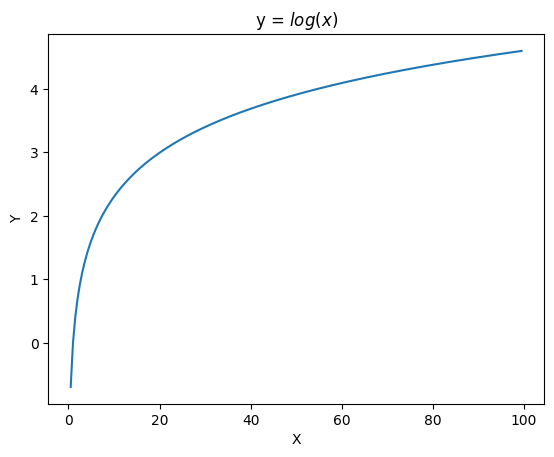

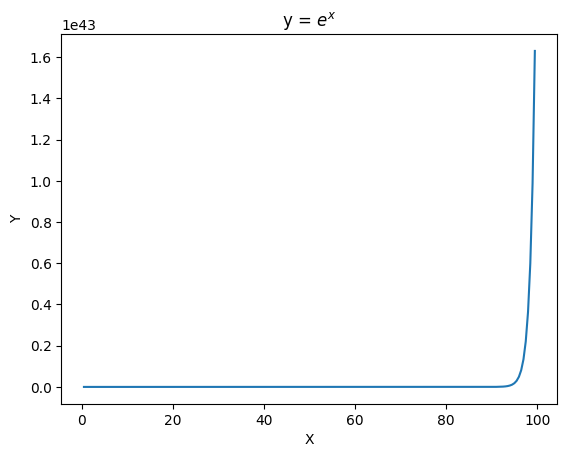

In [28]:
import matplotlib.pyplot as plt
import numpy as np
x = np.arange(0.5,100,0.5)
y = x
plt.title('y = x')
plt.xlabel('X')
plt.ylabel("Y")
plt.plot(x,y)
plt.show()

y = x**2
plt.title('y = $x^2$')
plt.xlabel('X')
plt.ylabel("Y")
plt.plot(x,y)
plt.show()

y = (x**3)/100
plt.title('y = $\\frac{x^3}{100}$')
plt.xlabel('X')
plt.ylabel("Y")
plt.plot(x,y)
plt.show()

y= np.sin(x)
plt.title('y = $sin(x)$')
plt.xlabel('X')
plt.ylabel("Y")
plt.plot(x,y)
plt.show()

y= (np.sin(x))/x
plt.title('y = $sin(x)/x$')
plt.xlabel('X')
plt.ylabel("Y")
plt.plot(x,y)
plt.show()

y= (np.log(x))
plt.title('y = $log(x)$')
plt.xlabel('X')
plt.ylabel("Y")
plt.plot(x,y)
plt.show()

y = np.e**x
plt.title('y = $e^x$')
plt.xlabel('X')
plt.ylabel("Y")
plt.plot(x,y)
plt.show()

$\textbf{Question 10}$

In [29]:
import numpy as np
import pandas as pd

matrix = np.random.uniform(1,2,(20,5))
df = pd.DataFrame(matrix,columns = ['a','b','c','d','e'])

stdmax = df.std().idxmax()
meanmin = df.mean(axis = 1).idxmin()


print("Column with the highest standard deviation:", stdmax)
print("Row with the lowest mean:", meanmin)
print()
df

Column with the highest standard deviation: d
Row with the lowest mean: 14



,a,b,c,d,e
0,1.878465,1.854319,1.014204,1.212423,1.719218
1,1.431198,1.336618,1.377214,1.903799,1.409195
2,1.924662,1.638933,1.330518,1.237162,1.930617
3,1.610960,1.701676,1.427821,1.576898,1.493207
4,1.264537,1.005342,1.458301,1.036351,1.610729
5,1.331562,1.487634,1.349006,1.618030,1.771936
6,1.566800,1.333738,1.524843,1.416827,1.581655
7,1.133974,1.566655,1.686992,1.853333,1.221371
8,1.398957,1.402853,1.222111,1.185391,1.938007
9,1.800812,1.982127,1.563355,1.611290,1.853098


$\textbf{Question 11}$

In [30]:
df['f'] = df['a']+df['b']+df['c']+df['d']+df['e']
df['g'] = 'GT8' 
df.loc[df['f']<8, "g"] = 'LT8'
df

,a,b,c,d,e,f,g
0,1.878465,1.854319,1.014204,1.212423,1.719218,7.678630,LT8
1,1.431198,1.336618,1.377214,1.903799,1.409195,7.458023,LT8
2,1.924662,1.638933,1.330518,1.237162,1.930617,8.061893,GT8
3,1.610960,1.701676,1.427821,1.576898,1.493207,7.810561,LT8
4,1.264537,1.005342,1.458301,1.036351,1.610729,6.375260,LT8
5,1.331562,1.487634,1.349006,1.618030,1.771936,7.558169,LT8
6,1.566800,1.333738,1.524843,1.416827,1.581655,7.423864,LT8
7,1.133974,1.566655,1.686992,1.853333,1.221371,7.462325,LT8
8,1.398957,1.402853,1.222111,1.185391,1.938007,7.147319,LT8
9,1.800812,1.982127,1.563355,1.611290,1.853098,8.810683,GT8


$\textbf{Question 13}$

Broadcasting is a feature of numpy arrays where arrays of different dimensions (if dimensions of one matrix is 1 or dimensions of both are equal are equal(as in 1x3 and 3x1)) can be used for arithemeatic operations. Below, A = 3 x 1 matrix and b is 1 x 3 matrix.  Now an addition opertion is being performed on them

In [1]:
import numpy as np

a = np.array([[1], [2], [3]])
print("Array a:\n", a)

b = np.array([4, 5, 6])
print("Array b:\n", b)

c = a + b
print("Array c (result of a + b):\n", c)

Array a:
 [[1]
 [2]
 [3]]
Array b:
 [4 5 6]
Array c (result of a + b):
 [[5 6 7]
 [6 7 8]
 [7 8 9]]


Here, array A got broadcast to [[1,1,1],[2,2,2],[3,3,3]] and array B got broad cast to [[4,5,6],[4,5,6],[4,5,6]] and then elements were added

$\textbf{Question 14}$

In [49]:
arr = np.random.uniform(1,100,(10,1))
min = arr[0]
argmin = 0
for i in range(len(arr)):
    if min > arr[i]:
        min = arr[i]
        argmin = i
print('Manually calculated argmin is',argmin)
print('Argmin calcuated by np.argmin',np.argmin(arr))

Manually calculated argmin is 4
Argmin calcuated by np.argmin 4
